<a href="https://colab.research.google.com/github/LuuissG/datawarehouse-e-datalake/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

warehouse1

In [1]:
import pandas as pd
import numpy as np

# Número de produtos
num_produtos = 600
# Criando um dicionário de produtos com 'produto_id', 'nome' e 'categoria'
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f'Produto{i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Criando um DataFrame com os dados dos produtos
df_produtos = pd.DataFrame(produtos)

# Número de vendas
num_vendas = 1000
# Criando um dicionário de vendas com 'data', 'produto_id', 'quantidade' e 'valor_total'
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 10000, num_vendas)
}

# Criando um DataFrame com os dados de vendas
df_vendas = pd.DataFrame(data_vendas)

# Salvando os DataFrames em arquivos CSV
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Lendo os arquivos CSV recém-criados
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames de vendas e produtos com base no 'produto_id'
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o resultado da mesclagem em um arquivo CSV, que representa o Data Warehouse
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo e exibindo o conteúdo do Data Warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data Warehouse")
print(df_warehouse)



Conteúdo do Data Warehouse
           data  produto_id  quantidade  valor_total        nome   categoria
0    2024-04-05         504         163         3649  Produto504  Eltrônicos
1    2024-04-16         301         191         2695  Produto301      Roupas
2    2024-04-23         301         183         3715  Produto301      Roupas
3    2024-04-15         301         191         9572  Produto301      Roupas
4    2024-04-03         301         159         6087  Produto301      Roupas
..          ...         ...         ...          ...         ...         ...
995  2024-04-16         148          56         1300  Produto148   Alimentos
996  2024-04-12         503         112         6268  Produto503   Alimentos
997  2024-04-25         533         158         3804  Produto533  Eltrônicos
998  2024-04-09         101         108         2965  Produto101   Alimentos
999  2024-04-05         212         102         3739  Produto212   Alimentos

[1000 rows x 6 columns]


warehouse2


Análise de vendas por produto:
            quantidade  valor_total
nome                               
Produto1           294        11276
Produto10          168         4251
Produto100         537        25486
Produto101         108         2965
Produto102         143         9081
...                ...          ...
Produto95          194        11473
Produto96          140         1666
Produto97          187         7288
Produto98          511        19652
Produto99          377         8482

[495 rows x 2 columns]

Análise de vendas por categoria de produto:
            quantidade  valor_total
categoria                          
Alimentos        41363      1890262
Eltrônicos       40199      1821874
Roupas           42601      1907672

Analise de tendencias temporais:
            quantidade  valor_total
data                               
2024-04-01        3199       154243
2024-04-02        4273       192534
2024-04-03        5529       243339
2024-04-04        3762       164956
20

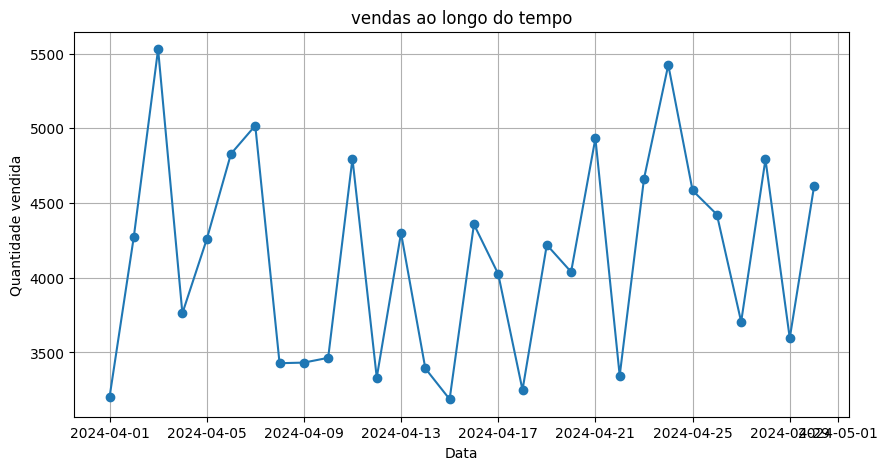


Analise de desempenho de produtos:
nome
Produto1      11276
Produto10      4251
Produto100    25486
Produto101     2965
Produto102     9081
              ...  
Produto95     11473
Produto96      1666
Produto97      7288
Produto98     19652
Produto99      8482
Name: valor_total, Length: 495, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo os dados do arquivo CSV e armazenando em um DataFrame
df_warehouse = pd.read_csv('data_warehouse.csv')

# Análise de vendas por produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade','valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Análise de vendas por categoria de produto
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade','valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o tipo datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Análise de tendências temporais
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnalise de tendencias temporais:")
print(vendas_por_data)

# Plotagem do gráfico de vendas ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()

# Análise de desempenho de produtos
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnalise de desempenho de produtos:")
print(desempenho_produto)


datalake1


In [5]:
import pandas as pd
import numpy as np
import os

#se nao existir a pasta "data lake" criar a pasta
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

#gerar 10 arquivos
num_files = 10
#cada arquivo tera 1000 linhas
num_rows_per_file = 1000

#lista para armazenas os arquivos e DataFrames
dfs = []

#Gera dados e salva em arquivos CSV
for i in range(num_files):
#gera dados aleatórios para cada arquivo
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A','B','C'], num_rows_per_file)
  }
#cria um dataframe a partir dos dados que foram gerados
  df = pd.DataFrame(data)

#define o nome do arquivo utilizando o número do loop
  file_name = f'data_lake/dados_{i+1}.csv'

  # Salva o DataFrame no arquivo CSV
  df.to_csv(file_name, index=False)

#adiciona o dataframe para lista "dfs"
  dfs.append((file_name, df))

#mensagem de geração correta
print("Dados do Data Lake gerados com sucesso!")

#imprimi os cincos primeiros registros de cada dataframe
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())

Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       97  0.243005       C
1       26  1.808927       A
2       42  1.069809       C
3       85 -0.133928       A
4       71  0.049712       A

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       82  1.771332       A
1       37  0.398444       A
2       59  0.381327       A
3       25  0.212567       A
4       53 -0.903892       C

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       58 -0.000787       C
1       81  1.107676       A
2       32  2.234729       B
3       28 -0.526684       A
4       27 -1.205586       C

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0        2  0.424821       C
1       11  1.387583       A
2       70 -0.521091       B
3       60 -1.708736       C
4       65 -1.292222       A

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       21  0.289214     

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Criando uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Nome da tabela a ser lida
table_name = 'dados_1'
# Lendo os dados da tabela para um DataFrame
df = pd.read_sql_table(table_name, engine)

# Exibindo as primeiras linhas do DataFrame
print("Primeiras linhas do Data Frame:")
print(df.head())

# Exibindo informações sobre o DataFrame (tipo de dados, número de entradas, etc.)
print("\nInformações sobre o Data Frame:")
print(df.info())

# Exibindo um resumo estatístico do DataFrame (média, desvio padrão, quartis, etc.)
print("\n Resumo estatístico do Data Frame:")
print(df.describe())

# Plotando um gráfico de dispersão entre coluna1 e coluna2 usando seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Grafico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plotando um histograma da coluna1 usando seaborn
plt.figure(figsize=(8, 6))
sns.histplot(x='coluna1', data=df, bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plotando um boxplot da coluna3 em relação à coluna1 usando seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()


ValueError: Table dados_1 not found